# [Goulib](../notebook.ipynb).image
image processing made easy



In [1]:


from PIL import Image as PILImage
from Goulib.image import Image

lena_original=Image('../tests/data/lena.png') #Image can be init'ed from a path

In [2]:
# all PIL functions and methods are available
size=(128,128)
lena=lena_original.resize(size)
lena_gray=lena.grayscale()
lena_neg=-lena #some functions from PIL.ImageOps are implemented as methods and operators
lena_rgb=lena.split() # split RGB bands
images=[lena,lena_gray,lena_rgb[0],lena_rgb[1],lena_rgb[2],lena_neg]

## Rendering
Images have an HTML representation which can be embedded in Goulib.table.Table for example:

Lena,Gray,R,G,B,Negative
,,,,,

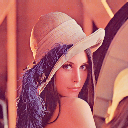
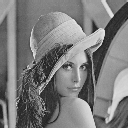
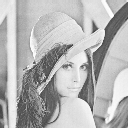
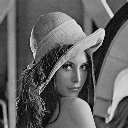
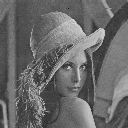
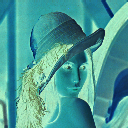

In [3]:
from Goulib.table import Table
Table([images],titles=['Lena','Gray','R','G','B','Negative'])

## Hash and Distances

"Image.average_hash" is implemented as [described here](http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html)

this hash is independent of image mode or size, which makes it perfect for finding duplicates in hudge images collections

moreover, it can be used to compute "distance" between images very quickly:

In [4]:
hashes=map(hash,images)
dist=[im.dist(lena) for im in images]
hash(lena),hashes,dist

(-1079554793,
 [-1079554793, -1079554793, -2004219562, -1591227237, 459493017, 1079554792],
 [0.0, 0.0, 0.375, 0.1875, 0.375, 2.0])

notice that a distance of 1 means "totally different" while a distance of 2 means "inverted

## Slice, Subimage, Correlation

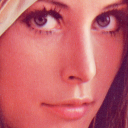

In [5]:
face=lena_original[246:374,225:353] # images can be sliced . Note the first coordinate is Y, then X
face

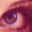

In [6]:
eye=face[3:35,-35:-3] # negative indexes are handy in some cases
eye

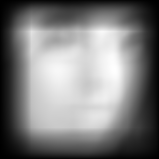

In [7]:
face.grayscale().correlation(eye.grayscale())

## Image Creation

,

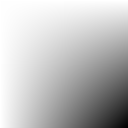
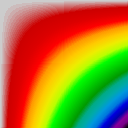

In [8]:
# Image can be created from standard Python lists and iterators, which are automatically normalized
# colormaps can be used to generate color images
from matplotlib import cm
a=[[-x*y for x in range(128)] for y in range(128)]
Table([[Image(a),Image(a,colormap=cm.spectral)]])

## Filtering

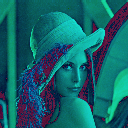

In [9]:
source = lena.split()
R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: 0 if i < 100 else 255)

# process the green band
out = source[G].point(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
source[R].paste(out, None, mask)

# build a new multiband image
PILImage.merge(lena.mode, source)